In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [8]:
from datetime import datetime

start=datetime(2010,1,1)
end=datetime.now()

df=yf.download("SBIN.NS",start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,195.716782,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,195.789368,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,196.963928,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,195.861984,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,195.276871,10453820
...,...,...,...,...,...,...
2023-06-01,581.799988,586.400024,581.000000,582.750000,582.750000,17820226
2023-06-02,584.700012,588.900024,583.000000,587.200012,587.200012,11323908
2023-06-05,588.500000,589.799988,586.000000,587.200012,587.200012,12920507


In [9]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,227.500000,230.000000,227.500000,229.119995,195.716782,11031470
1,2010-01-05,230.800003,231.000000,228.009995,229.205002,195.789368,11613740
2,2010-01-06,229.699997,231.500000,228.500000,230.580002,196.963928,14527930
3,2010-01-07,230.600006,231.000000,228.110001,229.289993,195.861984,8576510
4,2010-01-08,229.399994,230.389999,228.009995,228.604996,195.276871,10453820


In [10]:
df=df.drop(["Date","Adj Close"],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,227.500000,230.000000,227.500000,229.119995,11031470
1,230.800003,231.000000,228.009995,229.205002,11613740
2,229.699997,231.500000,228.500000,230.580002,14527930
3,230.600006,231.000000,228.110001,229.289993,8576510
4,229.399994,230.389999,228.009995,228.604996,10453820


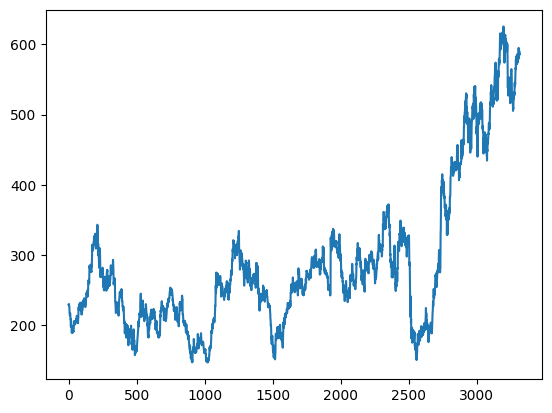

In [11]:
plt.plot(df.Close)

In [12]:
#100 day Moving average

ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3310    555.828999
3311    555.648999
3312    555.470000
3313    555.316999
3314    555.131999
Name: Close, Length: 3315, dtype: float64

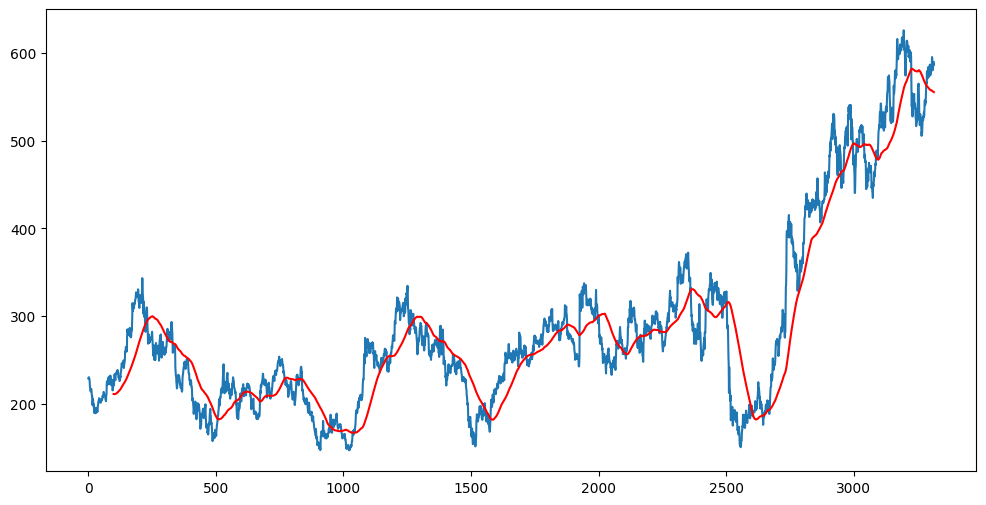

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"red")

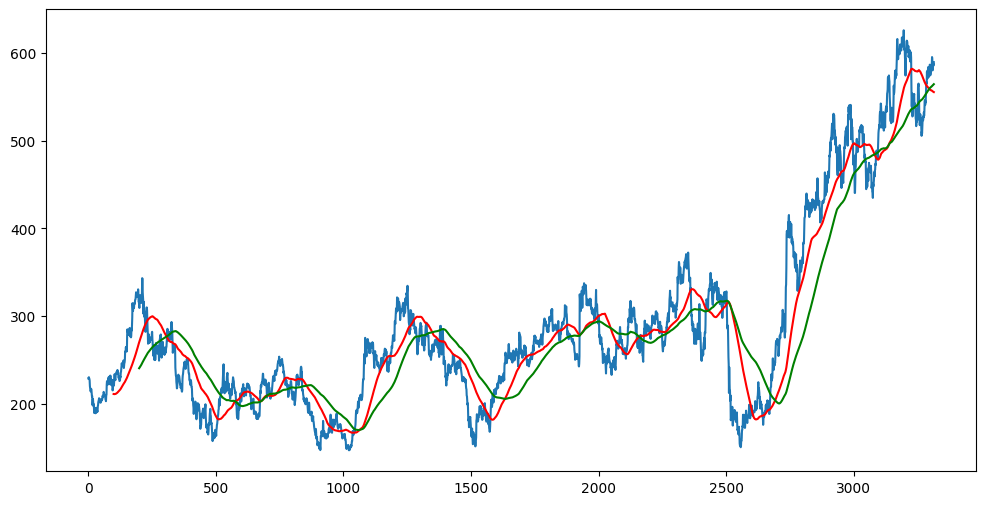

In [14]:
#200 days moving average

ma200=df.Close.rolling(200).mean()
ma200

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"red")
plt.plot(ma200,"green")

In [15]:
df.shape

(3315, 5)

In [16]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

There are no null values

In [17]:
#Splitting into training and testing

data_training=pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df["Close"][int(len(df)*0.70) : int(len(df))])

In [19]:
data_training.shape

(2320, 1)

In [20]:
data_test.shape

(995, 1)

In [21]:
data_training.head()

,Close
0,229.119995
1,229.205002
2,230.580002
3,229.289993
4,228.604996


In [22]:
data_test.head()

,Close
2320,355.450012
2321,352.399994
2322,336.899994
2323,342.049988
2324,344.299988


In [23]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array=scalar.fit_transform(data_training)
data_training_array

array([[0.38144999],
       [0.38184658],
       [0.38826163],
       ...,
       [0.93911534],
       [0.96197619],
       [0.95707749]])

In [26]:
x_train=[]
y_train=[]

for i in   range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i, 0])

x_train ,y_train =np.array(x_train) ,np.array(y_train)

In [27]:
x_train

array([[[0.38144999],
        [0.38184658],
        [0.38826163],
        ...,
        [0.34795184],
        [0.35728281],
        [0.37099935]],

       [[0.38184658],
        [0.38826163],
        [0.38224311],
        ...,
        [0.35728281],
        [0.37099935],
        [0.34340297]],

       [[0.38826163],
        [0.38224311],
        [0.37904726],
        ...,
        [0.37099935],
        [0.34340297],
        [0.36607722]],

       ...,

       [[0.68787897],
        [0.69301104],
        [0.71027338],
        ...,
        [0.97037415],
        [1.        ],
        [0.99230184]],

       [[0.69301104],
        [0.71027338],
        [0.68368007],
        ...,
        [1.        ],
        [0.99230184],
        [0.93911534]],

       [[0.71027338],
        [0.68368007],
        [0.67061677],
        ...,
        [0.99230184],
        [0.93911534],
        [0.96197619]]])

In [28]:
y_train

array([0.34340297, 0.36607722, 0.37963045, ..., 0.93911534, 0.96197619,
       0.95707749])

In [30]:
x_train.shape

(2220, 100, 1)

In [31]:
from keras.layers import Dense ,Dropout, LSTM
from keras.models import Sequential

In [33]:
model=Sequential()

model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [35]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
70/70 [==============================] - 59s 677ms/step - loss: 0.0478
Epoch 2/50
70/70 [==============================] - 50s 722ms/step - loss: 0.0128
Epoch 3/50
70/70 [==============================] - 46s 655ms/step - loss: 0.0114
Epoch 4/50
70/70 [==============================] - 46s 653ms/step - loss: 0.0110
Epoch 5/50
70/70 [==============================] - 46s 649ms/step - loss: 0.0090
Epoch 6/50
70/70 [==============================] - 45s 644ms/step - loss: 0.0086
Epoch 7/50
70/70 [==============================] - 45s 648ms/step - loss: 0.0086
Epoch 8/50
70/70 [==============================] - 45s 644ms/step - loss: 0.0072
Epoch 9/50
70/70 [==============================] - 46s 652ms/step - loss: 0.0075
Epoch 10/50
70/70 [==============================] - 45s 646ms/step - loss: 0.0072
Epoch 11/50
70/70 [==============================] - 46s 655ms/step - loss: 0.0070
Epoch 12/50
70/70 [==============================] - 46s 659ms/step - loss: 0.0065
Epoch 13/50
7

In [36]:
model.save("stocks_model.h5")

In [37]:
from google.colab import files
files.download("stocks_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
data_test.head()

,Close
2320,355.450012
2321,352.399994
2322,336.899994
2323,342.049988
2324,344.299988


In [39]:
past_100_days=data_training.tail(100)

In [40]:
final_df=past_100_days.append(data_test,ignore_index=True)

<ipython-input-40-f3fd9580a1f0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_test,ignore_index=True)


In [41]:
final_df.head()

,Close
0,293.899994
1,291.100006
2,297.649994
3,296.299988
4,305.299988


In [42]:
input_data=scalar.fit_transform(final_df)
input_data

array([[0.30137994],
       [0.29548088],
       [0.3092805 ],
       ...,
       [0.91930899],
       [0.9154113 ],
       [0.92352262]])

In [43]:
input_data.shape

(1095, 1)

In [44]:
x_test=[]
y_test=[]

for i in  range(100,input_data.shape[0]):
  x_test.append(input_data[i-100 :i])
  y_test.append(input_data[i,0])

In [45]:
x_test,y_test= np.array(x_test), np.array(y_test)

In [46]:
x_test

array([[[0.30137994],
        [0.29548088],
        [0.3092805 ],
        ...,
        [0.4167281 ],
        [0.42705148],
        [0.42483935]],

       [[0.29548088],
        [0.3092805 ],
        [0.30643629],
        ...,
        [0.42705148],
        [0.42483935],
        [0.43105448]],

       [[0.3092805 ],
        [0.30643629],
        [0.32539763],
        ...,
        [0.42483935],
        [0.43105448],
        [0.42462865]],

       ...,

       [[0.95702091],
        [0.94764568],
        [0.96249871],
        ...,
        [0.90382382],
        [0.90993363],
        [0.91930899]],

       [[0.94764568],
        [0.96249871],
        [0.9360582 ],
        ...,
        [0.90993363],
        [0.91930899],
        [0.91930899]],

       [[0.96249871],
        [0.9360582 ],
        [0.93932374],
        ...,
        [0.91930899],
        [0.91930899],
        [0.9154113 ]]])

In [48]:
y_test.shape

(995,)

In [49]:
x_test.shape

(995, 100, 1)

In [50]:
#Making predictions

y_pred=model.predict(x_test)

32/32 [==============================] - 3s 49ms/step


In [53]:
y_pred[:5]

array([[0.41352373],
       [0.41280138],
       [0.4154301 ],
       [0.40999046],
       [0.40035954]], dtype=float32)

In [54]:
scalar.scale_

array([0.00210682])

In [55]:
#reversing back the scaled values

scale_factor=1/0.00210682
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

In [56]:
y_pred[:5]

array([[196.27863],
       [195.93576],
       [197.18347],
       [194.60156],
       [190.03026]], dtype=float32)

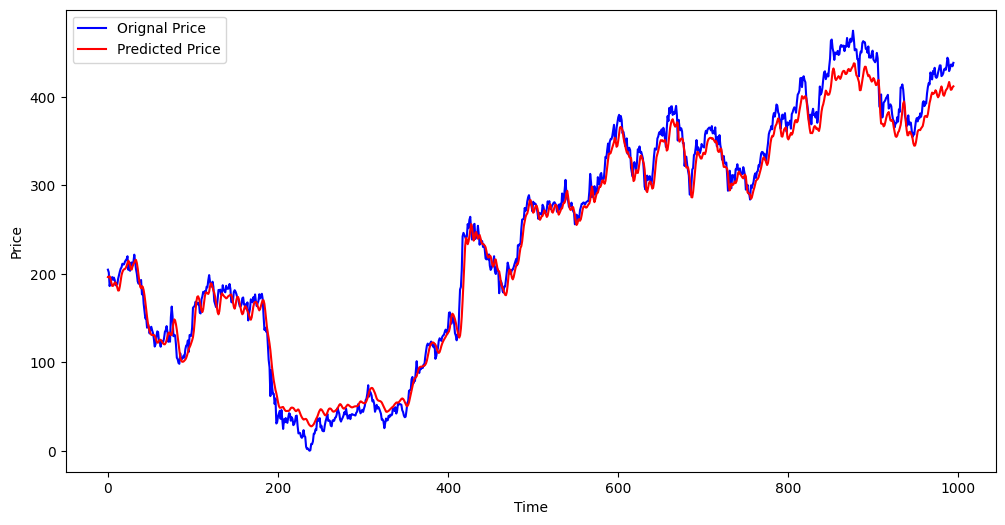

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"blue",label="Orignal Price")
plt.plot(y_pred,"red",label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()